In [1]:
import pandas as pd

df = pd.read_csv('power_ratio.csv')
df.head()

,year,county,residential,service industry,public department,industry,other
0,2021,新北市,41.88,26.38,2.85,28.77,0.12
1,2021,台北市,35.09,52.79,8.25,3.79,0.08
2,2021,桃園市,17.54,13.77,1.64,66.87,0.18
3,2021,台中市,18.70,15.44,1.94,63.44,0.48
4,2021,台南市,13.69,9.14,1.51,74.29,1.37


In [4]:
df['year'].value_counts()

2021    22
2020    22
2019    22
2018    22
Name: year, dtype: int64

In [11]:
df.columns

Index(['year', 'county', 'residential', 'service industry',
       'public department', 'industry', 'other'],
      dtype='object')

In [15]:
county_num = df['county'].nunique()
year_df = df.groupby('year')
ratio_2021 = year_df.get_group(2021)
ratio_2021[['residential', 'service industry', 'public department', 'industry', 'other']].agg(['sum']) / county_num

,residential,service industry,public department,industry,other
sum,28.97,23.146818,4.708182,40.797727,2.377273


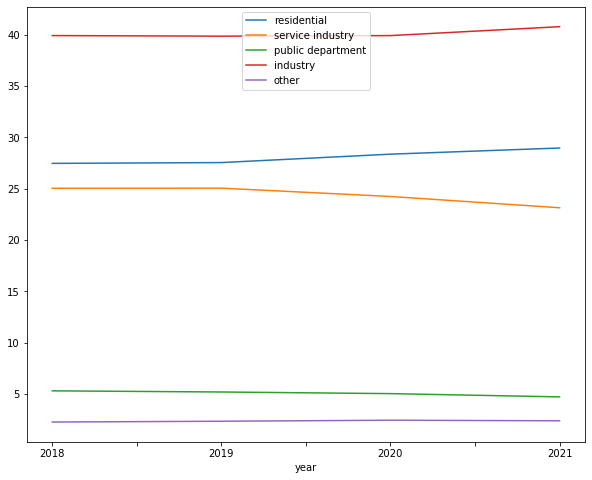

In [32]:
year_df = df.groupby('year')
years = year_df.groups.keys()

result_df = pd.DataFrame()

for year in years:
    ratio_df = year_df.get_group(year)
    cur_df = ratio_df[['residential', 'service industry', 'public department', 'industry', 'other']].agg(['sum']) / county_num
    cur_df = cur_df.reset_index(drop = True)
    cur_df['year'] = year
    result_df = pd.concat([result_df, cur_df])

result_df['year'] = result_df['year'].astype(str)
result_df.plot(x='year',  figsize=(10,8))

In [33]:
result_df

,residential,service industry,public department,industry,other,year
0,27.470909,25.045455,5.295909,39.931818,2.255909,2018
0,27.550455,25.056364,5.185000,39.874545,2.333636,2019
0,28.369545,24.244545,5.025000,39.929091,2.432273,2020
0,28.970000,23.146818,4.708182,40.797727,2.377273,2021
